# Data Quality Checks

### Content:
- Perform EDA
- Mixed Type Data Check
- Missing Value Check
- Fix Inconsistency Issue
- Duplicates

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#import data set
path = '/Users/kimballwightman/Desktop/Projects/Used Car Listings Analysis/'

In [3]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Original Data','true_car_listings.csv'))

## Perform EDA

In [4]:
df_cars.shape

(852122, 8)

In [5]:
df_cars.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [6]:
#check the continuous variables
df_cars.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [7]:
#Price first
df_cars['Price'].value_counts().sort_index()

1500      85
1511       1
1527       1
1534       1
1550       2
          ..
462000     1
469973     1
469991     1
490000     1
499500     1
Name: Price, Length: 47124, dtype: int64

The min and max seemed really even numbers, so I checked to see if there were mutliple values above or below that defaulted to those values. The min value of 1500 is observed 85 times. If they actually are cars with low prices that could be below 1500, then I'd expect them to have on old year and high mileage, which I'll check below.

In [8]:
df_min_price = df_cars[df_cars['Price']==1500]

In [9]:
df_min_price.head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model
64010,1500,2002,107885,Philadelphia,PA,2G4WS52J321276604,Buick,Century4dr
64965,1500,1998,100296,Levittown,PA,2G4WY52M9W1574802,Buick,Century4dr
67075,1500,1998,177213,South Jordan,UT,1G4CU5219W4643710,Buick,Park
68710,1500,1999,160000,Newark,NJ,2G4WB52K6X1507138,Buick,Regal4dr
102581,1500,2009,129703,Lakewood,NJ,KL1TD56E69B664751,Chevrolet,Aveo4dr
106684,1500,2006,110480,Miami,FL,KL1TD66606B644067,Chevrolet,Aveo5dr
112120,1500,1998,113842,Middlesboro,KY,1G1NE52M1W6200680,Chevrolet,Malibu4dr
135021,1500,2004,132519,South Jordan,UT,1GNDX03E04D170692,Chevrolet,VentureExt
135230,1500,2002,160369,Chicago,IL,1GNDT13S222423883,Chevrolet,TrailBlazer4dr
138315,1500,2003,178717,Valdosta,GA,1G1JC52F137258414,Chevrolet,Cavalier4dr


These seem to actually be really low value cars. The data comes from TrueCar.com, which might not let you list a price below 1500. Since there are only 85 out of 852,122 instances, and values can't go much lower than 1500, I'm considering them to be negligible. They'll hardly skew the results of our analysis at all.

<AxesSubplot:ylabel='Frequency'>

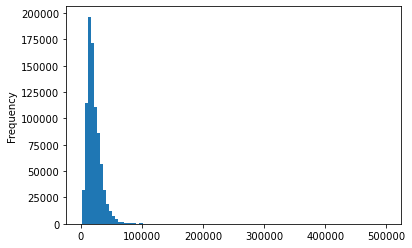

In [10]:
df_cars['Price'].plot.hist(bins = 100)

In [11]:
#Mileage next
df_cars['Mileage'].value_counts().sort_index()

5          350
6          173
7          138
8          180
9          153
          ... 
1650780      1
1814638      1
2137327      1
2457832      1
2856196      1
Name: Mileage, Length: 158836, dtype: int64

<AxesSubplot:ylabel='Frequency'>

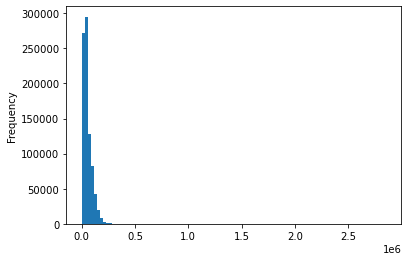

In [12]:
df_cars['Mileage'].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

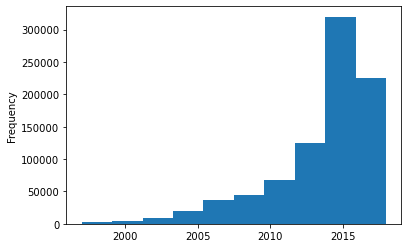

In [13]:
#check distribution of year as well
df_cars['Year'].plot.hist(bins = 10)

In [14]:
df_cars.head(20)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


In [15]:
#check the categorical variables
df_cars['City'].value_counts()

Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64

In [16]:
df_cars['State'].value_counts().sort_index()

 AK     1663
 AL    13293
 AR     6952
 AZ    22401
 Az       63
 CA    80437
 CO    23004
 CT    10906
 Ca       31
 DC       25
 DE     2418
 FL    72530
 Fl      783
 GA    39414
 Ga      109
 HI     2995
 IA     4840
 ID     3501
 IL    38680
 IN    16465
 KS     7894
 KY    13691
 LA     8528
 MA    17990
 MD    17572
 ME     1920
 MI    10328
 MN    10996
 MO    16165
 MS     6242
 MT     1984
 Md      135
 NC    37530
 ND     1092
 NE     4924
 NH     5694
 NJ    27852
 NM     4729
 NV     6887
 NY    27932
 OH    23259
 OK     9584
 OR    10352
 Oh       52
 PA    28130
 RI     1858
 SC     9790
 SD     1267
 TN    19166
 TX    94654
 UT    10418
 VA    35011
 VT     1123
 Va      248
 WA    23149
 WI    11255
 WV     1501
 WY      610
 ga      100
Name: State, dtype: int64

There are inconsistencies in Arizona, California, Florida, Georgia(GA,Ga,ga), Maryland, Ohio, and Virginia.

In [17]:
df_cars['Make'].value_counts()

Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab            

In [18]:
df_cars['Model'].value_counts()

Silverado          24932
Grand              17321
Accord             14502
F-1504WD           14177
Altima2.5          11288
                   ...  
EdgeLTD                1
ExpeditionEddie        1
EscortSE               1
Ranger                 1
V60Polestar            1
Name: Model, Length: 2736, dtype: int64

### Mixed Type Data

In [19]:
for col in df_cars.columns.tolist():
    mix = (df_cars[[col]].applymap(type) != df_cars[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df_cars[mix]) > 0:
        print (col)

No mixed type columns.

### Missing Values

In [20]:
df_cars.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

No missing values.

### Fix the Inconsistency in the State variable

In [21]:
df_cars['State'].replace({' Az':' AZ',' Ca':' CA',' Fl':' FL',' Ga':' GA',' ga':' GA',' Md':' MD',' Oh':' OH',' Va':' VA',}, inplace = True)


In [22]:
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [23]:
df_cars['State'].value_counts().sort_index()

 AK     1663
 AL    13293
 AR     6952
 AZ    22464
 CA    80468
 CO    23004
 CT    10906
 DC       25
 DE     2418
 FL    73313
 GA    39623
 HI     2995
 IA     4840
 ID     3501
 IL    38680
 IN    16465
 KS     7894
 KY    13691
 LA     8528
 MA    17990
 MD    17707
 ME     1920
 MI    10328
 MN    10996
 MO    16165
 MS     6242
 MT     1984
 NC    37530
 ND     1092
 NE     4924
 NH     5694
 NJ    27852
 NM     4729
 NV     6887
 NY    27932
 OH    23311
 OK     9584
 OR    10352
 PA    28130
 RI     1858
 SC     9790
 SD     1267
 TN    19166
 TX    94654
 UT    10418
 VA    35259
 VT     1123
 WA    23149
 WI    11255
 WV     1501
 WY      610
Name: State, dtype: int64

In [24]:
df_cars.shape

(852122, 8)

### Duplicates

In [25]:
df_dups = df_cars[df_cars.duplicated()]

In [26]:
df_dups

,Price,Year,Mileage,City,State,Vin,Make,Model
120948,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120949,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120950,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120951,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120952,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
120953,11495,2014,80086,Langhorne,PA,1G1JC6SH8E4194609,Chevrolet,SonicHatchback
120954,28800,2017,4165,Smyrna,GA,2GNFLGE38H6240856,Chevrolet,EquinoxAWD
120955,14771,2014,78400,New Haven,IN,1G1125S39EU113487,Chevrolet,Impala2LT
120956,15907,2015,65274,Corpus Christi,TX,2G1FB1E30F9190774,Chevrolet,CamaroCoupe
120957,12894,2014,57113,Delray Beach,FL,1G1RA6E44EU129757,Chevrolet,VoltPlug-In


In [27]:
df_no_dups = df_cars.drop_duplicates()

In [28]:
df_no_dups.shape

(852092, 8)

New dataframe has 30 fewer rows, duplicates were successfully dropped.

In [29]:
df_no_dups.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [30]:
#export the dataset
df_no_dups.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_cleaned.csv'))

### Data Accuracy

We returned to this script after finding some issues with prices from the 6.2 script with exploratory analysis. We'll do some more cleaning from here forward and save a new cleaned dataset to use back in 6.2.

In [31]:
#look at outlier car prices' model and see if there are other similar models to compare by. Use them to impute
#we'll need to take out the normally high-priced cars and then do searches for them individually
price_outliers = df_no_dups[~df_no_dups['Make'].isin(['Acura','Aston','Audi','Bentley','Ferrari','Lamborghini','Land','Maserati','McLaren','Mercedes-Benz','Porsche','Rolls-Royce'])]


In [32]:
pd.options.display.max_rows = None

price_outliers[price_outliers['Price']>= 99000]

,Price,Year,Mileage,City,State,Vin,Make,Model
69150,99998,2006,277835,Rockford,MI,1G4HD572X6U214387,Buick,Lucerne4dr
69151,99999,2002,205342,Rockford,MI,1G4HP54K32U244045,Buick,LeSabre4dr
84189,99995,2017,19775,Morrow,GA,1GYKNBRS0HZ124135,Cadillac,XT5Luxury
84197,99999,2004,191000,Rockford,MI,1GYEE637440175225,Cadillac,SRX4dr
84198,374813,2017,12511,Beachwood,OH,2G61N5S3XH9125733,Cadillac,XTSAWD
186430,99999,2012,48618,Morrow,GA,1G1ZB5E09CF258888,Chevrolet,MalibuLS
186448,99999,2014,70275,Morrow,GA,2GNALBEK4E6253085,Chevrolet,EquinoxFWD
186451,99999,2015,45900,Midlothian,VA,1GNSKBKC3FR157247,Chevrolet,Tahoe4WD
186452,110000,2016,1021,Cartersville,GA,1G1YU2D6XG5700244,Chevrolet,CorvetteCoupe
186455,99999,2003,103529,Harrison,AR,1GNEK13Z63R289389,Chevrolet,Tahoe4dr


Outlier models:
 
- Buick: Lucerne4dr, LeSabre4dr
- Cadillac: XTSAWD
- Chevrolet: CorvetteCoupe, Silverado, TraverseFWD
- Chrysler: Town
- Dodge: ViperSRT, ViperGTC, DartSXT, JourneyFWD, ViperACR
- Ford: MustangCoupe, GT2dr
- GMC: AcadiaAWD
- Honda: Civic, OdysseyEX, CR-V4WD, PilotEX, Ridgeline4WD
- Hyundai: Sonata2.4L, ElantraLimited, SonataSE, Elantra4dr, VeracruzAWD
- Jaguar: XF35t
- Jeep: CompassLatitude, Wrangler, Grand, RenegadeSport, RenegadeTrailhawk
- Lexus: GS, LFA2dr, 
- Maybach: 624dr
- Mercury: Grand
- Nissan: GT-RNISMO, GT-RPremium,
- Pontiac: Grand
- Ram: 1500Lone, ProMaster
- Subaru: Impreza
- Tesla: Model (blank)
- Toyota: CorollaS, CamryXSE, CamryL, PriusFive, CorollaSE, CamryXLE, Prius, CorollaL, Camry4dr, Yaris5-Door, Highlander4dr, 4Runner4dr

In [33]:
#I used this line of code iteratively for each model we found.
df_no_dups[(df_no_dups['Model']=='4Runner4dr')]

,Price,Year,Mileage,City,State,Vin,Make,Model
774040,4965,1999,165,Fairfax,VA,JT3GN86R5X0130276,Toyota,4Runner4dr
790496,3995,2004,143300,Houston,TX,JTEZU14RX48022794,Toyota,4Runner4dr
791614,8990,2006,106788,Nashville,TN,JTEBU14R068074892,Toyota,4Runner4dr
792503,8995,2004,94523,Bronx,NY,JTEBU14R640048065,Toyota,4Runner4dr
792890,7700,2004,122123,Countryside,IL,JTEBU14R448014286,Toyota,4Runner4dr
793143,7795,2006,132057,Miami,FL,JTEZU14R368050701,Toyota,4Runner4dr
793255,9853,2006,124600,Austin,TX,JTEZU14RX68064031,Toyota,4Runner4dr
793700,7500,2002,108549,Melbourne,FL,JT3GN86R620245297,Toyota,4Runner4dr
793888,8499,2003,114902,Brooklyn Center,MN,JTEBU17R230018121,Toyota,4Runner4dr
794074,6000,2002,120819,Logan,OH,JT3HN86R220368597,Toyota,4Runner4dr


In [34]:
#find the median price for each model to use in imputation
df_no_dups.groupby('Model').agg({'Price':['median']})

,Price
,median
Model,
1,14995.0
124,25980.5
1500,24800.0
15002WD,17990.0
15004WD,22500.0
1500Big,29947.0
1500Express,30991.0
"1500Express,",25995.0


In [35]:
#I used this line of code iteratively for imputing values
df_no_dups.loc[(df_no_dups['Model']=='4Runner4dr') & (df_no_dups['Price']>99000),'Price'] = 8999


Some of the names of the models of cars only got the first part picked up in the web-scraping. For example, the model "Grand" applies to Dodge, Jeep, Mercury, Pontiac, and Suzuki. I made sure for these kinds of models to find the median price based on its make alone, not including the prices of other similarly named models of different makes.

The only problem/limitation here with this dataset is that I have no way of separating prices of models like "Grand" for Jeep, when Jeep has multiple models that begin with "Grand". 

For outlier models that didn't have hardly any other models to compare against and had a feasible price, I left them in the dataset. Being a rare model is much more likely to have a high price. An example of this is the Dodge Vipers.

There were a lot of car listings in Morrow, GA for around 99999.0. Even if there was a dealer listing all of their cars at that price, it wouldn't be representative of each car's worth, and would need to be imputed anyway. Need to search for any other listings from that location and correct them.

In [36]:
#now for the high-priced models. I'm using the catplot from 6.2's exploratory analysis to eyeball the cutoffs on price
df_no_dups[(df_no_dups['Price']>= 110000) & (df_no_dups['Make']== 'Acura')]

,Price,Year,Mileage,City,State,Vin,Make,Model
11029,162500,2017,119,Sarasota,FL,19UNC1B08HY000729,Acura,NSXCoupe
11030,165888,2017,374,Thousand Oaks,CA,19UNC1B08HY000259,Acura,NSXCoupe
11031,165997,2017,532,Pelham,AL,19UNC1B06HY000793,Acura,NSXCoupe
11032,169929,2017,1522,Hoffman Estates,IL,19UNC1B09HY000335,Acura,NSXCoupe
11033,169998,2017,197,Wichita,KS,19UNC1B05HY000462,Acura,NSXCoupe
11034,175600,2017,26,Brentwood,TN,19UNC1B0XHY000716,Acura,NSXCoupe
11035,173998,2017,543,Palatine,IL,19UNC1B03HY000086,Acura,NSXCoupe
11036,164837,2017,150,Woodside,NY,19UNC1B06HY000180,Acura,NSXCoupe
11037,165399,2017,52,Tucson,AZ,19UNC1B02HY000435,Acura,NSXCoupe
11038,164995,2017,94,Virginia Beach,VA,19UNC1B00HY000224,Acura,NSXCoupe


In [37]:
df_no_dups[(df_no_dups['Price']>= 250000) & (df_no_dups['Make']== 'Bentley')]

,Price,Year,Mileage,City,State,Vin,Make,Model
24244,279990,2017,3966,Rancho Mirage,CA,SCBBF7ZHXHC002795,Bentley,MulsanneSedan
24245,279988,2017,1197,Naples,FL,SJAAC2ZV7HC015466,Bentley,BentaygaW12


In [38]:
df_no_dups[(df_no_dups['Model']=='BentaygaW12')]

,Price,Year,Mileage,City,State,Vin,Make,Model
24223,199995,2017,10722,Northbrook,IL,SJAAC2ZV9HC014402,Bentley,BentaygaW12
24224,209899,2017,3696,Newport Beach,CA,SJAAC2ZV9HC015565,Bentley,BentaygaW12
24225,209899,2017,8200,Newport Beach,CA,SJAAC2ZV5HC012520,Bentley,BentaygaW12
24226,209877,2017,6009,Hillside,NJ,SJAAC2ZV5HC015059,Bentley,BentaygaW12
24230,215000,2017,1395,Charlotte,NC,SJAAC2ZV7HC015743,Bentley,BentaygaW12
24231,214999,2017,1843,Charlotte,NC,SJAAC2ZV9HC014867,Bentley,BentaygaW12
24232,215000,2017,2184,Charlotte,NC,SJAAC2ZVXHC015736,Bentley,BentaygaW12
24233,214888,2017,2786,New York,NY,SJAAC2ZV6HC013952,Bentley,BentaygaW12
24234,215000,2017,3540,Montclair,CA,SJAAC2ZV7HC015094,Bentley,BentaygaW12
24236,224995,2017,263,Northbrook,IL,SJAAC2ZV4HC015823,Bentley,BentaygaW12


In [39]:
df_no_dups[(df_no_dups['Price']>= 300000) & (df_no_dups['Make']== 'McLaren')]

,Price,Year,Mileage,City,State,Vin,Make,Model
595936,369900,2016,110,Fort Lauderdale,FL,SBM11SAA3GW067517,McLaren,675LT2dr
595937,374990,2016,780,Newtown Square,PA,SBM11SAA8GW675680,McLaren,675LT2dr
595938,384983,2016,725,Pinellas Park,FL,SBM11SAA6GW067513,McLaren,675LT2dr
595939,398765,2016,169,Beverly Hills,CA,SBM11SAA0GW675575,McLaren,675LT2dr
595940,427730,2016,330,Newtown Square,PA,SBM11SAA8GW675758,McLaren,675LT2dr
595941,433500,2016,322,Beverly Hills,CA,SBM11SAAXGW675583,McLaren,675LT2dr
595942,459880,2016,313,Beverly Hills,CA,SBM11SAAXGW675941,McLaren,675LT2dr


In [40]:
df_no_dups[(df_no_dups['Model']=='675LT2dr')]

,Price,Year,Mileage,City,State,Vin,Make,Model
595936,369900,2016,110,Fort Lauderdale,FL,SBM11SAA3GW067517,McLaren,675LT2dr
595937,374990,2016,780,Newtown Square,PA,SBM11SAA8GW675680,McLaren,675LT2dr
595938,384983,2016,725,Pinellas Park,FL,SBM11SAA6GW067513,McLaren,675LT2dr
595939,398765,2016,169,Beverly Hills,CA,SBM11SAA0GW675575,McLaren,675LT2dr
595940,427730,2016,330,Newtown Square,PA,SBM11SAA8GW675758,McLaren,675LT2dr
595941,433500,2016,322,Beverly Hills,CA,SBM11SAAXGW675583,McLaren,675LT2dr
595942,459880,2016,313,Beverly Hills,CA,SBM11SAAXGW675941,McLaren,675LT2dr


In [41]:
df_no_dups[(df_no_dups['Price']>= 350000) & (df_no_dups['Make']== 'Mercedes-Benz')]

,Price,Year,Mileage,City,State,Vin,Make,Model
622263,395000,2006,4284,Edison,NJ,WDDAJ76F46M000953,Mercedes-Benz,SLR
622264,490000,2008,3307,Encino,CA,WDDAK76F78M001594,Mercedes-Benz,SLR
622265,499500,2014,3260,Westville,NJ,WDDRJ7HA4EA010693,Mercedes-Benz,SLS


In [42]:
df_no_dups[(df_no_dups['Model']=='SLR')]

,Price,Year,Mileage,City,State,Vin,Make,Model
622253,245000,2006,2781,Doral,FL,WDDAJ76F56M000721,Mercedes-Benz,SLR
622261,305995,2006,4672,SEATTLE,WA,WDDAJ76F46M000693,Mercedes-Benz,SLR
622262,315000,2008,11383,HOUSTON,TX,WDDAK76F28M001471,Mercedes-Benz,SLR
622263,395000,2006,4284,Edison,NJ,WDDAJ76F46M000953,Mercedes-Benz,SLR
622264,490000,2008,3307,Encino,CA,WDDAK76F78M001594,Mercedes-Benz,SLR


In [43]:
df_no_dups[(df_no_dups['Price']>= 350000) & (df_no_dups['Make']== 'Porsche')]

,Price,Year,Mileage,City,State,Vin,Make,Model
704106,419500,2016,69,Los Angeles,CA,WP0AF2A98GS195145,Porsche,9112dr
704107,449000,2016,44,New York,NY,WP0AF2A97GS195329,Porsche,9112dr
704108,449900,2011,8459,Freeport,NY,WP0AF2A97BS785667,Porsche,9112dr


In [44]:
df_no_dups[(df_no_dups['Model']=='9112dr')]

,Price,Year,Mileage,City,State,Vin,Make,Model
700885,17000,2004,108434,Union City,GA,WP0CA29914S651851,Porsche,9112dr
701030,20800,2004,98397,Mesa,AZ,WP0CA29964S650212,Porsche,9112dr
701036,19995,2004,109845,Rockville,MD,WP0AA29934S620480,Porsche,9112dr
701057,23964,2004,73495,Scottsdale,AZ,WP0BA29944S635140,Porsche,9112dr
701100,27994,2004,37986,Sugar Land,TX,WP0AA29974S621471,Porsche,9112dr
701103,23995,2004,75141,Burr Ridge,IL,WP0CA29904S650206,Porsche,9112dr
701108,23150,2004,92973,Santa Clara,CA,WP0CA29924S651518,Porsche,9112dr
701109,24990,2004,80926,Lexington,SC,WP0AA29914S621756,Porsche,9112dr
701138,25995,2004,59389,Brea,CA,WP0CA29924S652345,Porsche,9112dr
701159,26895,2004,66200,Greenville,SC,WP0AA29964S623034,Porsche,9112dr


All of the outlier prices for the high-priced makes of vehicles appear to be ligitmate. We won't impute any of their values.

To keep these outliers from affecting our analysis, we'll either just use them anyway or else remove the specific models that would be considered luxury cars.

In [45]:
#check for any more of the listings from Morrow, GA
df_no_dups[(df_no_dups['City']=='Morrow') &  (df_no_dups['Price']>99900)]

,Price,Year,Mileage,City,State,Vin,Make,Model
84189,99995,2017,19775,Morrow,GA,1GYKNBRS0HZ124135,Cadillac,XT5Luxury
186430,99999,2012,48618,Morrow,GA,1G1ZB5E09CF258888,Chevrolet,MalibuLS
186448,99999,2014,70275,Morrow,GA,2GNALBEK4E6253085,Chevrolet,EquinoxFWD
349728,99999,2016,17800,Morrow,GA,1FADP3F23GL249219,Ford,FocusSedan
349738,99999,2016,26614,Morrow,GA,1FADP3F25GL323630,Ford,FocusSedan
349739,99995,2016,26848,Morrow,GA,1FADP3F27GL304268,Ford,FocusSedan
349741,99999,2016,28672,Morrow,GA,1FADP3K23GL393178,Ford,FocusHatchback
349744,99999,2016,47420,Morrow,GA,1FADP3F27GL385174,Ford,FocusSedan
349745,99999,2016,48546,Morrow,GA,1FADP3F20GL308825,Ford,FocusSedan
429115,99999,2016,69336,Morrow,GA,19XFC2F59GE034228,Honda,Civic


In [46]:
df_no_dups.groupby('Model').agg({'Price':['median']})

,Price
,median
Model,
1,14995.0
124,25980.5
1500,24800.0
15002WD,17990.0
15004WD,22500.0
1500Big,29947.0
1500Express,30991.0
"1500Express,",25995.0


In [47]:
df_no_dups.loc[(df_no_dups['Model']=='Murano2WD') & (df_no_dups['Price']>99900) & (df_no_dups['Price']<=100000),'Price'] = 17548


In [48]:
df_no_dups[(df_no_dups['City']=='Morrow') &  (df_no_dups['Price']>99900)]

,Price,Year,Mileage,City,State,Vin,Make,Model
84189,99995,2017,19775,Morrow,GA,1GYKNBRS0HZ124135,Cadillac,XT5Luxury
186430,99999,2012,48618,Morrow,GA,1G1ZB5E09CF258888,Chevrolet,MalibuLS
186448,99999,2014,70275,Morrow,GA,2GNALBEK4E6253085,Chevrolet,EquinoxFWD
349728,99999,2016,17800,Morrow,GA,1FADP3F23GL249219,Ford,FocusSedan
349738,99999,2016,26614,Morrow,GA,1FADP3F25GL323630,Ford,FocusSedan
349739,99995,2016,26848,Morrow,GA,1FADP3F27GL304268,Ford,FocusSedan
349741,99999,2016,28672,Morrow,GA,1FADP3K23GL393178,Ford,FocusHatchback
349744,99999,2016,47420,Morrow,GA,1FADP3F27GL385174,Ford,FocusSedan
349745,99999,2016,48546,Morrow,GA,1FADP3F20GL308825,Ford,FocusSedan
429115,99999,2016,69336,Morrow,GA,19XFC2F59GE034228,Honda,Civic


We've cleaned/imputed all the values for listings in Morrow, GA.

In [49]:
#export the dataset
df_no_dups.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_prices_clean.csv'))